<a href="https://colab.research.google.com/github/eiko-y/UCSD-SPRINGBOARD-Capstone/blob/main/Parkinsons_UPDRS_MLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MLE Capstone Project

DATA is from: https://archive.ics.uci.edu/dataset/189/parkinsons+telemonitoring

In [1]:
from google.colab import files
uploaded = files.upload()

Saving parkinsons_updrs.data to parkinsons_updrs.data


In [2]:
import pandas as pd
df = pd.read_csv("parkinsons_updrs.data")

Data Exploration

In [3]:
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [4]:
df.isnull().sum() #output shows no missing values

,0
subject#,0
age,0
sex,0
test_time,0
motor_UPDRS,0
total_UPDRS,0
Jitter(%),0
Jitter(Abs),0
Jitter:RAP,0
Jitter:PPQ5,0


In [5]:
rows, columns = df.shape
print(f"There are {rows} rows and {columns} columns in the dataset.")

There are 5875 rows and 22 columns in the dataset.


In [6]:
print(df.columns)

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')


Correlation matrix to explore relationships between columns. We suspect that motor_UPDRS will be highly correlated to total_UPDRS.

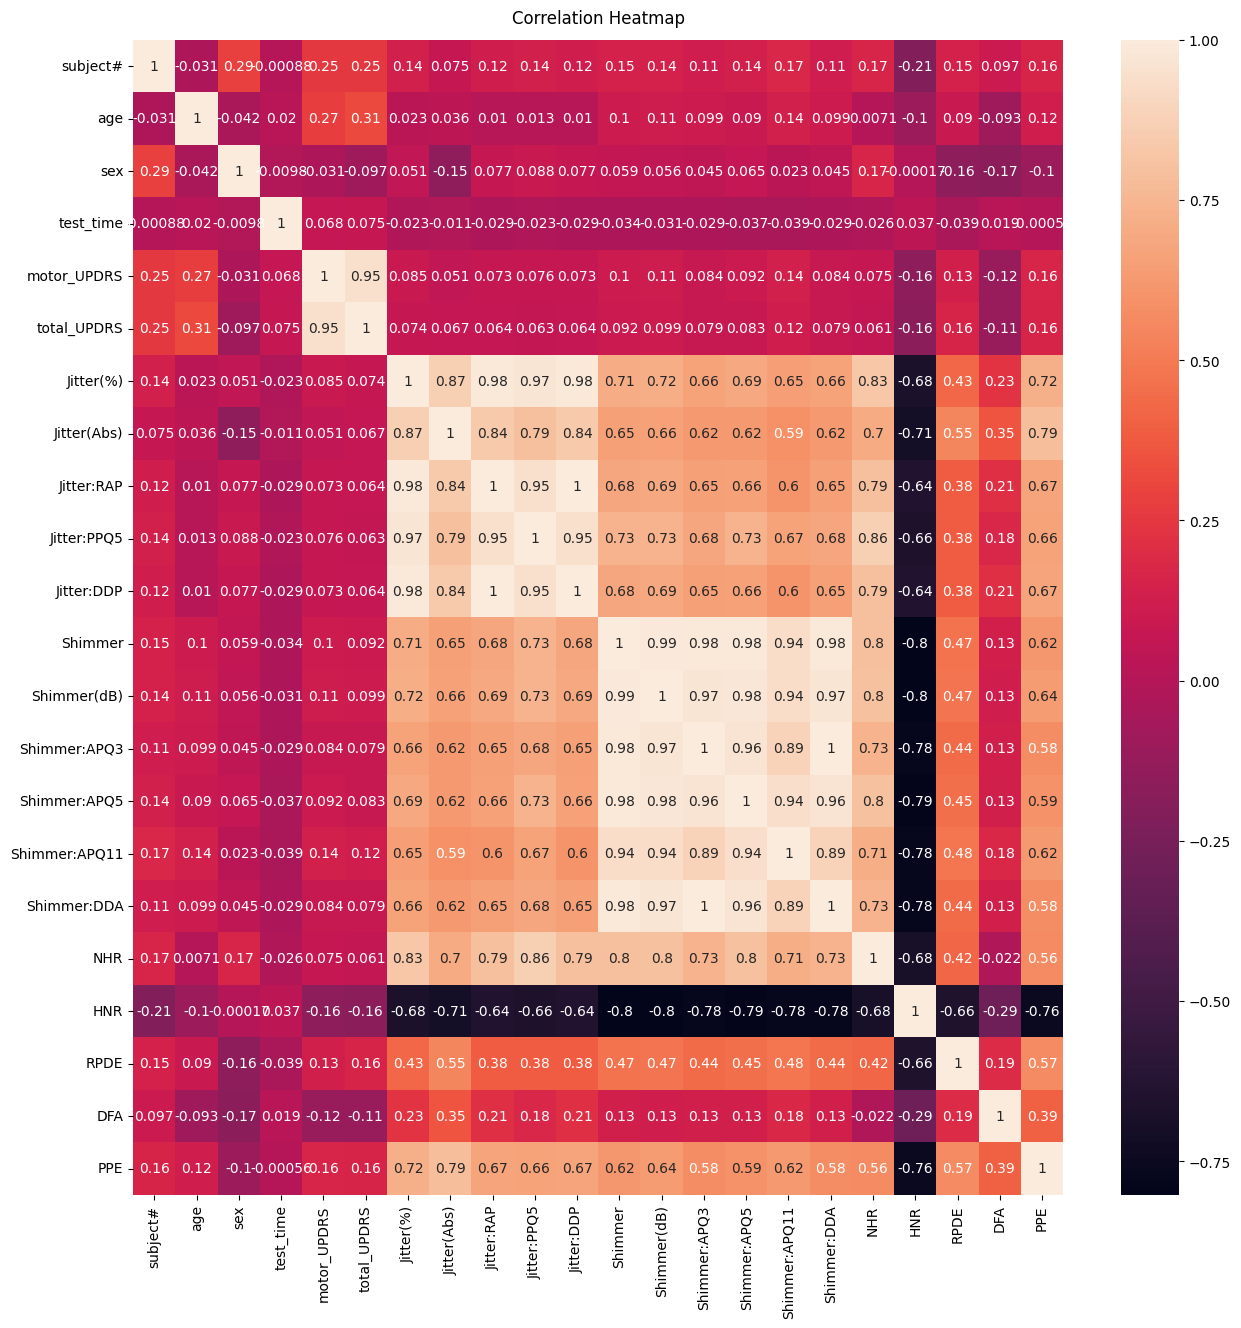

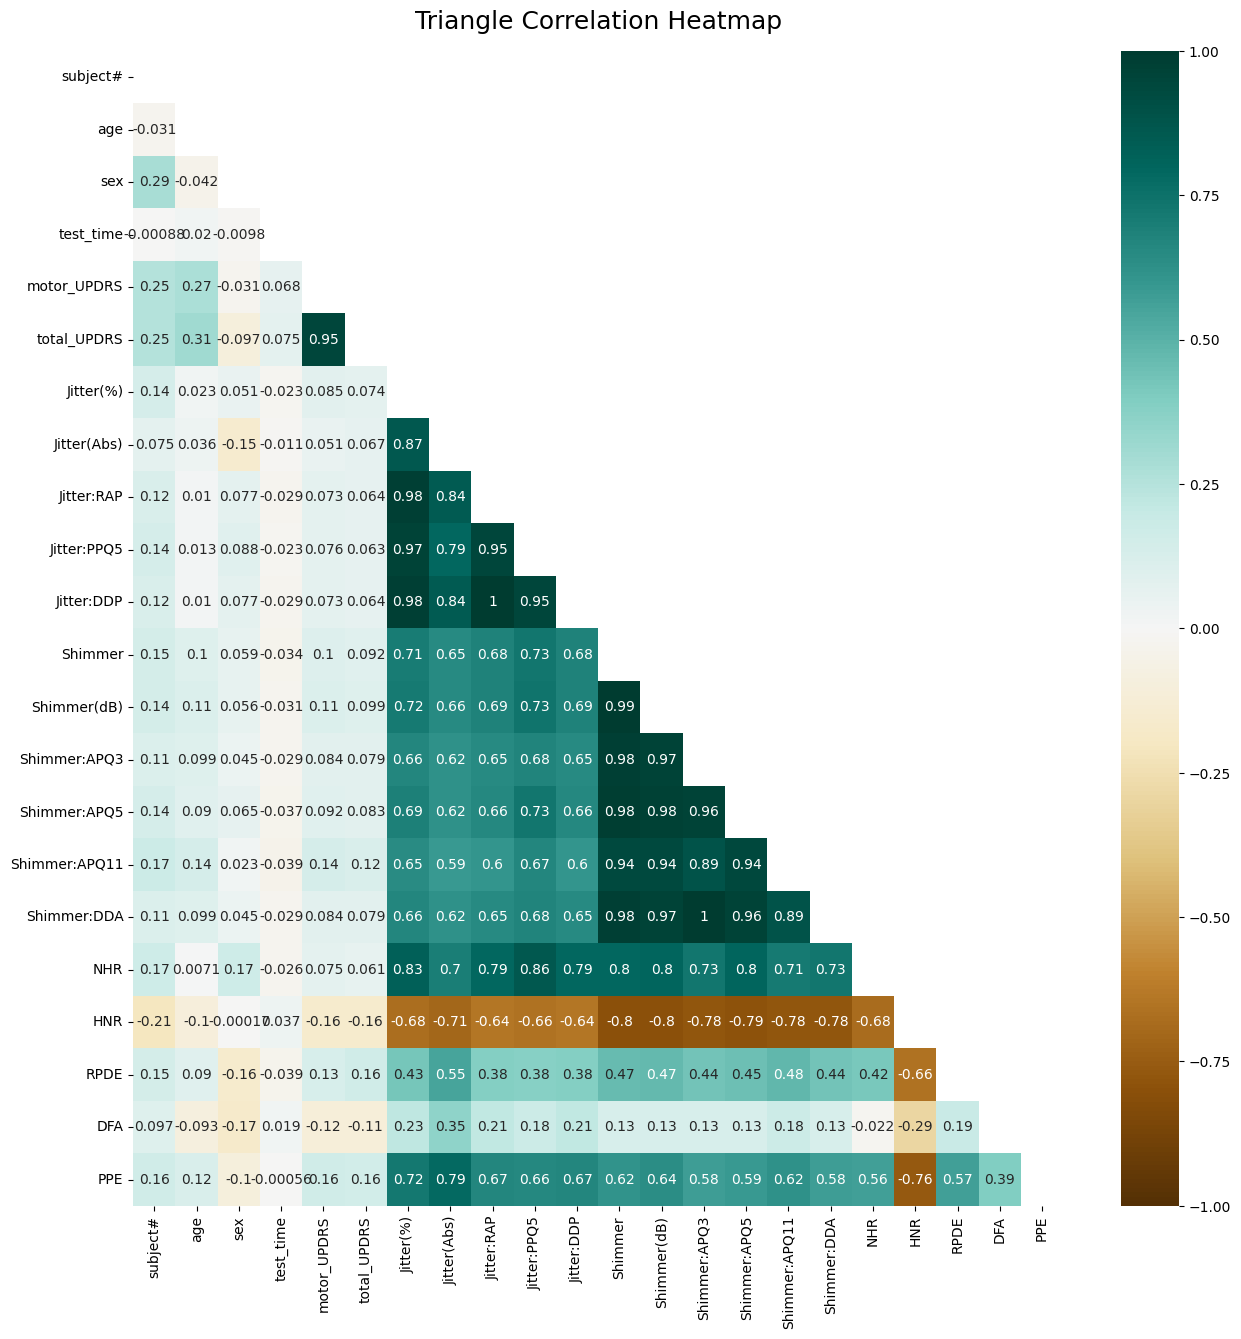

In [7]:
#Heatmap correlation matrix to check for high correlation between features and target
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr = df.corr()
plt.figure(figsize=(15,15))
corr = sns.heatmap(corr, annot=True)
corr.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


plt.show()


# define the mask to set the values in the upper triangle to True
plt.figure(figsize=(15,15))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

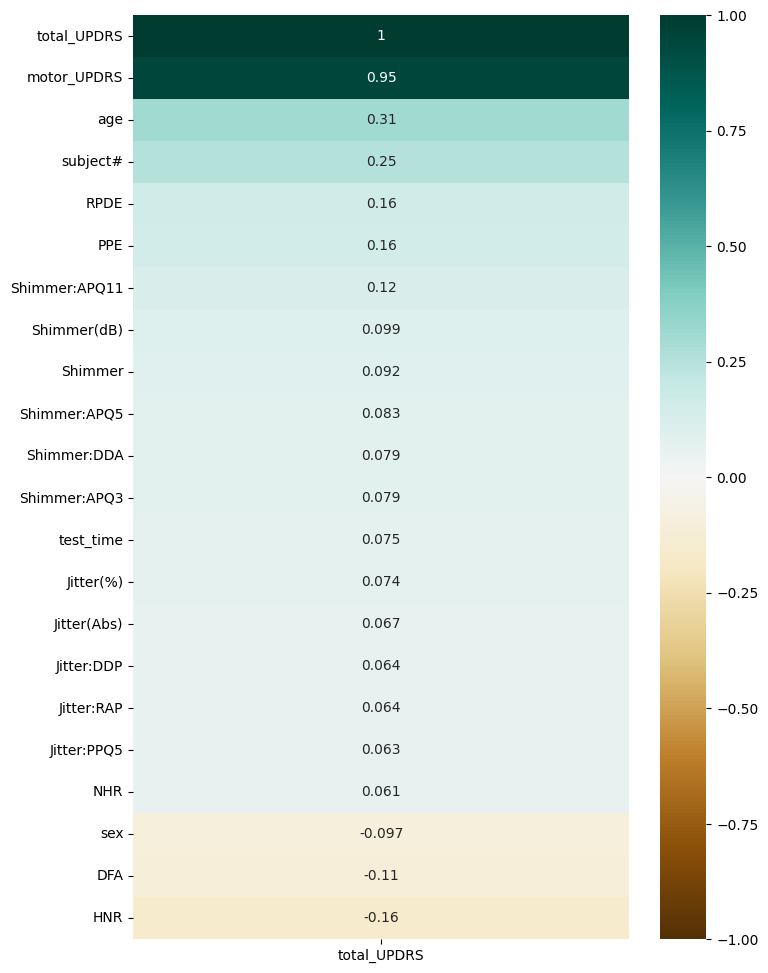

In [8]:
#Drop motor_UPDRS because of its high correlation with total_UPDRS
plt.figure(figsize=(8, 12))
by_UPDRS = sns.heatmap(df.corr()[['total_UPDRS']].sort_values(by='total_UPDRS', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Total UPDRS', fontdict={'fontsize':18}, pad=16);

In [9]:
UPDRS_DF = df.drop(columns=['motor_UPDRS', 'subject#'])
print(UPDRS_DF.columns)

Index(['age', 'sex', 'test_time', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)',
       'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)',
       'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR',
       'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')


Now that the we have explored the data, we can begin setting up for model development and training.

In [10]:
#split into training and test data with total_UPDRS
from sklearn.model_selection import train_test_split
X = UPDRS_DF.drop(columns=['total_UPDRS'])
y = UPDRS_DF['total_UPDRS']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#define models and their hyperparameter
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "LinearRegression": {
        "model": LinearRegression(),
        "params": {
            # No hyperparameters
        }
    },
    "RandomForest": {
        "model": RandomForestRegressor(),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingRegressor(),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5],
            "min_samples_split": [2, 5]
        }
    }
}

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

#automated process using GridSearchCV to find the best model

results = {}

for name, m in models.items():
    print(f"Training and tuning {name}...")

    if m["params"]:  # Use GridSearchCV if hyperparameters are defined
        grid = GridSearchCV(m["model"], m["params"], cv=5, scoring='r2', n_jobs=-1, verbose=2)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        best_params = grid.best_params_

    else:  # Fit LinearRegression
        m["model"].fit(X_train, y_train)
        best_model = m["model"]
        best_params = "N/A"

    # Predict and evaluate
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "model": best_model,
        "r2_score": r2,
        "best_params": best_params
    }

print("\n Model Comparison:")
for name, res in results.items():
    print(f"{name}: R_squared = {res['r2_score']:.4f}, Best Params: {res['best_params']}")

Training and tuning LinearRegression...
Training and tuning RandomForest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Training and tuning GradientBoosting...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

 Model Comparison:
LinearRegression: R_squared = 0.1580, Best Params: N/A
RandomForest: R_squared = 0.9759, Best Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
GradientBoosting: R_squared = 0.9515, Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}


Visualizing

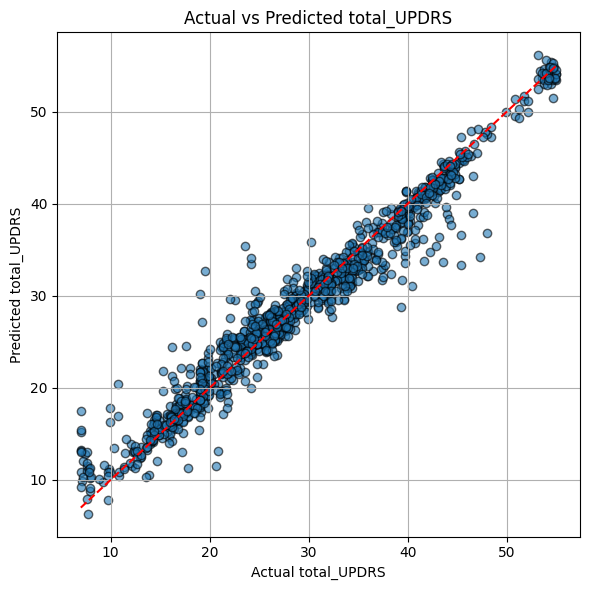

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual total_UPDRS')
plt.ylabel('Predicted total_UPDRS')
plt.title('Actual vs Predicted total_UPDRS')
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
#Random Forest Regressor works very well. Now we compare the r2 scores on the new data
#small, expected difference.
from sklearn.metrics import r2_score

y_pred = best_model.predict(X_test)

print(r2_score(y_test, y_pred))


0.9514512390648958


In [17]:
#In addition to R_squared we can test other metrics for the random forest model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 1.5160646631250676
RMSE: 2.319447336905692


In [18]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
print("CV R² scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())

CV R² scores: [0.95344322 0.95222966 0.94153242 0.95289597 0.94931131]
Mean CV R²: 0.9498825165025411


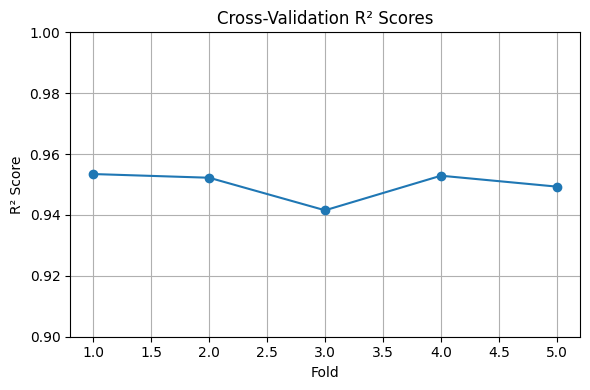

In [20]:
cv_scores = [0.95344322, 0.95222966, 0.94153242, 0.95289597, 0.94931131]
plt.figure(figsize=(6, 4))
plt.plot(range(1, 6), cv_scores, marker='o')
plt.ylim(0.9, 1.0)
plt.title("Cross-Validation R² Scores")
plt.xlabel("Fold")
plt.ylabel("R² Score")
plt.grid(True)
plt.tight_layout()
plt.show()